# analysis_d23b
Use functions in [**`d23b.py`**](d23b.py) to perform analysis and produce figures for _Unknown Dependence Between Ice Sheets Contributes Ambiguity to Sea-level Projections_.

Author: Benjamin S. Grandey, 2023

In [1]:
! date

Fri Jul  7 09:21:48 +08 2023


In [2]:
import d23b
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pyvinecopulib as pv
import time

In [3]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.2
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.5.0

conda environment: d23b-ice-dependence

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [4]:
# Projection source, scenario, year, and number of samples to use for analysis
projection_source = 'fusion'
scenario = 'SSP5-8.5'
year = 2100
n_samples = int(1e5)

## Relationship between sources of uncertainty and model-based projections of the ice-sheet components
The schematic is produced separately using [**schematic_fig_d23b.pptx**](schematic_fig_d23b.pptx): first, export from PowerPoint to `fig01.pdf` (in `figs_d23b/f_pdf/`), then export `fig01.pdf` to `fig01.png` (in `figs_d23b/f_png/`).

In [5]:
# Are the .pdf and .png versions of the schematic more recent than the .pptx version?
schematic_pptx = Path('schematic_fig_d23b.pptx')
fig_name = f'fig{next(d23b.f_num):02}'  # name based on counter, then update counter (in prep for next fig)
schematic_pdf = Path(f'figs_d23b/f_pdf/{fig_name}.pdf')
schematic_png = Path(f'figs_d23b/f_png/{fig_name}.png')
for f in (schematic_pptx, schematic_pdf, schematic_png):
    try:
        print(f'{time.ctime(f.stat().st_mtime)}: {f.name}')
    except FileNotFoundError:
        print(f'Not found: {f.name}')

Wed May  3 11:15:29 2023: schematic_fig_d23b.pptx
Fri May 12 14:45:55 2023: fig01.pdf
Fri May 12 14:46:24 2023: fig01.png


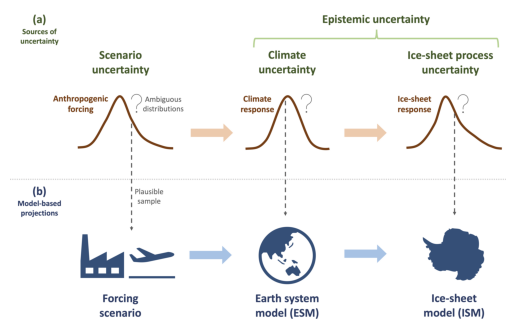

In [6]:
# Show schematic
plt.imshow(plt.imread(schematic_png))
plt.axis('off')
plt.show()

## Fitted copula for EAIS–WAIS dependence in ISM ensemble
This bivariate copula is used is the analysis below.

p21_l23_bicop = <pyvinecopulib.Bicop>
Gumbel, parameters = 3.12259
p21_l23_family = BicopFamily.gumbel
p21_l23_tau = 0.6797533770925688
p21_l23_rotation = 0


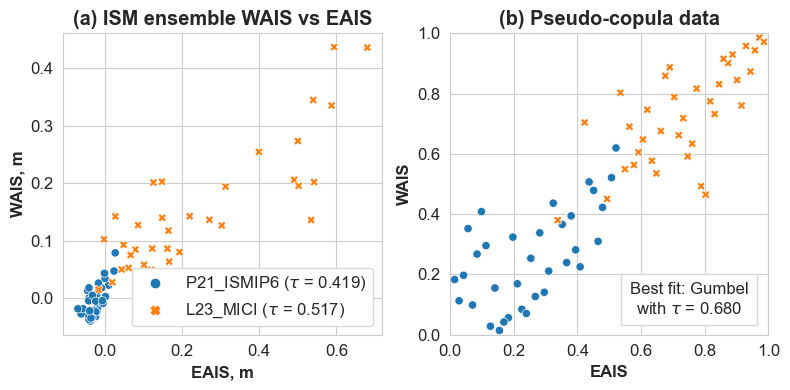

In [7]:
# Get fitted copula (used now) and associated figure (used below)
p21_l23_bicop, p21_l23_fig, _ = d23b.fig_p21_l23_ism_data(ref_year=2015, target_year=year)
# Copula family, rotation, and tau
p21_l23_family = p21_l23_bicop.family
p21_l23_rotation = p21_l23_bicop.rotation
p21_l23_tau = p21_l23_bicop.tau
# Print copula information
print(f'p21_l23_bicop = {p21_l23_bicop}')
print(f'p21_l23_family = {p21_l23_family}')
print(f'p21_l23_tau = {p21_l23_tau}')
print(f'p21_l23_rotation = {p21_l23_rotation}')

## Modelling dependence

read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2100): including PEN in WAIS.
Written fig02.pdf (0.32 MB)
Written fig02.png (0.52 MB)


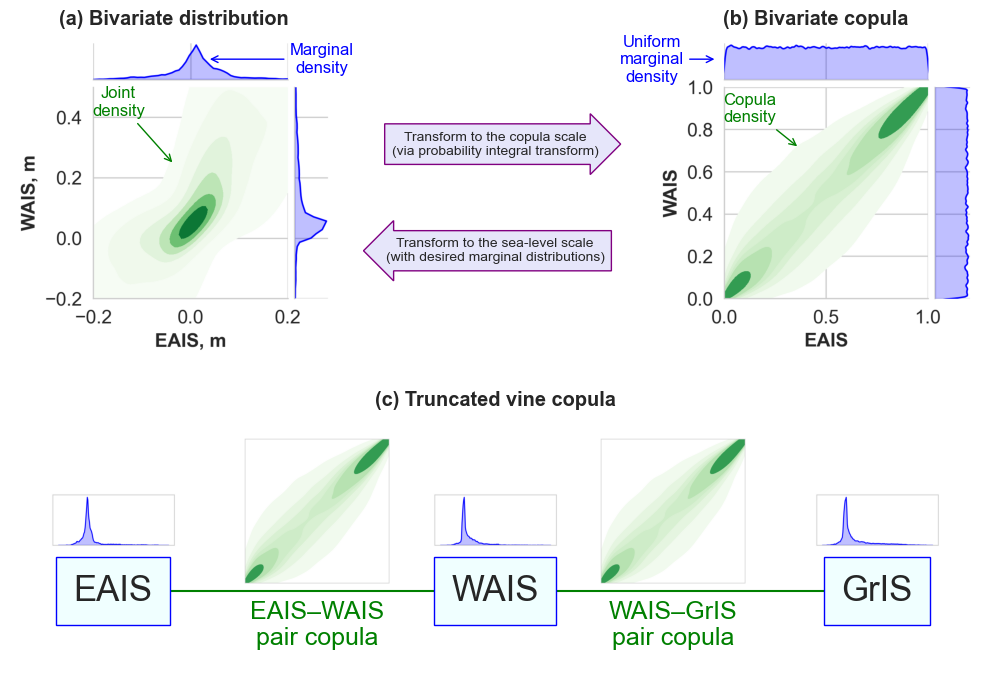

In [8]:
fig = d23b.fig_illustrate_bivariate_copula_vine(projection_source=projection_source, scenario=scenario, year=year,
                                                family=p21_l23_family, rotation=p21_l23_rotation, tau=p21_l23_tau,
                                                n_samples=n_samples)
_ = d23b.name_save_fig(fig, feso='f')

## Total ice-sheet contribution versus Kendall’s τ

Written fig03.pdf (0.03 MB)
Written fig03.png (0.30 MB)


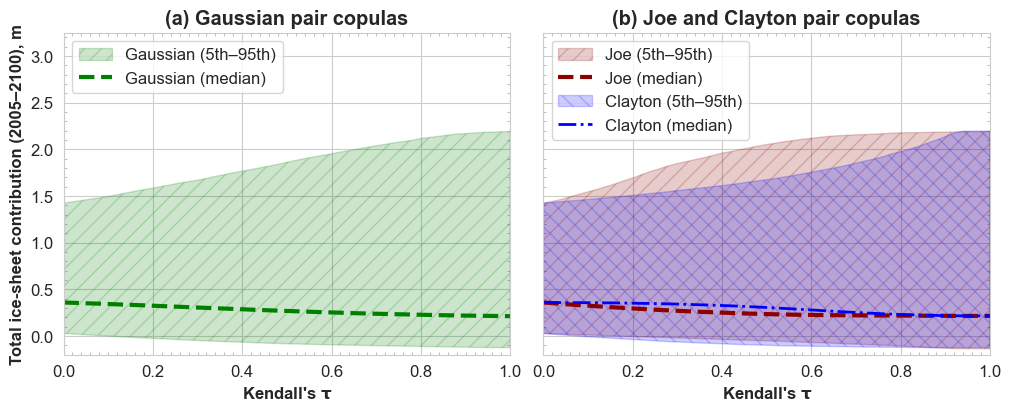

In [9]:
fig, _ = d23b.fig_total_vs_tau(projection_source=projection_source, scenario=scenario, year=year,
                               families_a=(pv.BicopFamily.gaussian, ), families_b=(pv.BicopFamily.joe, pv.BicopFamily.clayton),
                               colors_a=('green', ), colors_b=('darkred', 'blue'), ylim=(-0.2, 3.25),
                               n_samples=n_samples)
_ = d23b.name_save_fig(fig, feso='f')

## Total ice-sheet contribution derived for different copulas

read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2020): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2030): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2040): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2050): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2060): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2070): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2080): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2090): including PEN in WAIS.
Written fig04.pdf (0.03 MB)
Written fig04.png (0.37 MB)


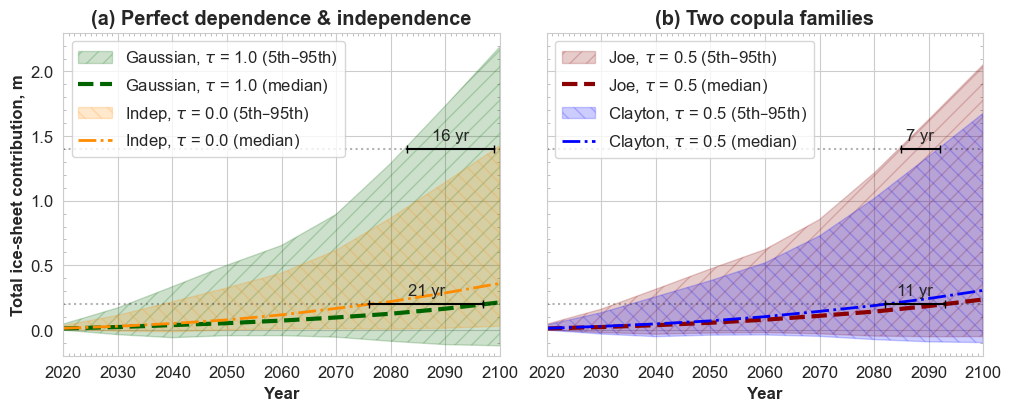

In [10]:
fig, _ = d23b.fig_total_vs_time(projection_source=projection_source, scenario=scenario, years=np.arange(2020, 2101, 10),
                                families_a=(pv.BicopFamily.gaussian, pv.BicopFamily.indep), taus_a=(1.0, 0.0),
                                colors_a=('darkgreen', 'darkorange'), title_a='Perfect dependence & independence',
                                families_b=(pv.BicopFamily.joe, pv.BicopFamily.clayton), taus_b=(0.5, 0.5),
                                colors_b=('darkred', 'blue'), title_b='Two copula families',
                                thresh_for_timing_diff=(1.4, 0.2), ylim=(-0.2, 2.3),
                                n_samples=n_samples)
_ = d23b.name_save_fig(fig, feso='f')

## Fig showing EAIS–WAIS dependence in ISM ensemble

In [11]:
# Save figure produced above
_ = d23b.name_save_fig(p21_l23_fig, feso='f')

Written fig05.pdf (0.04 MB)
Written fig05.png (0.20 MB)


## Two alternative approaches

Written fig06.pdf (0.03 MB)
Written fig06.png (0.35 MB)


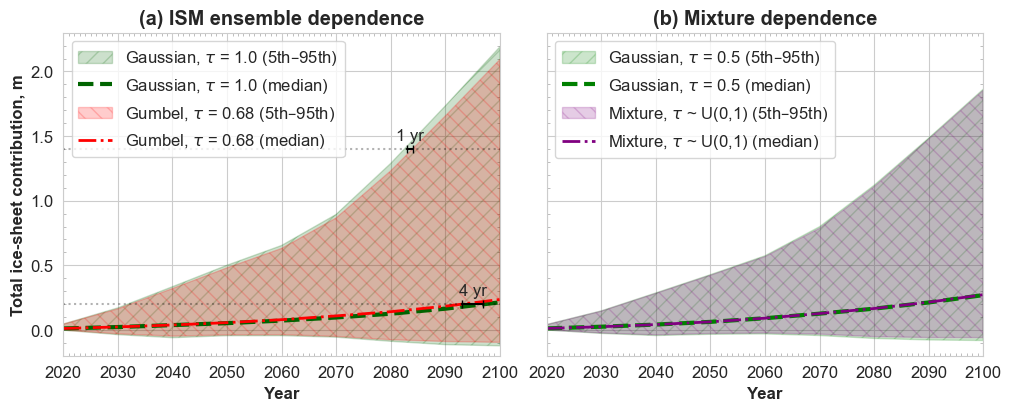

In [12]:
fig, _ = d23b.fig_total_vs_time(projection_source=projection_source, scenario=scenario, years=np.arange(2020, 2101, 10),
                                families_a=(pv.BicopFamily.gaussian, p21_l23_family), taus_a=(1.0, p21_l23_tau),
                                colors_a=('darkgreen', 'red'), title_a='ISM ensemble dependence',
                                families_b=(pv.BicopFamily.gaussian, 'Mixture'), taus_b=(0.5, (0, 1)),
                                colors_b=('green', 'purple'), title_b='Mixture dependence',
                                thresh_for_timing_diff=(1.4, 0.2), ylim=(-0.2, 2.3),
                                n_samples=n_samples)
_ = d23b.name_save_fig(fig, feso='f')

## Marginal densities of the three ice-sheet components

Written e01.pdf (0.03 MB)
Written e01.png (0.17 MB)


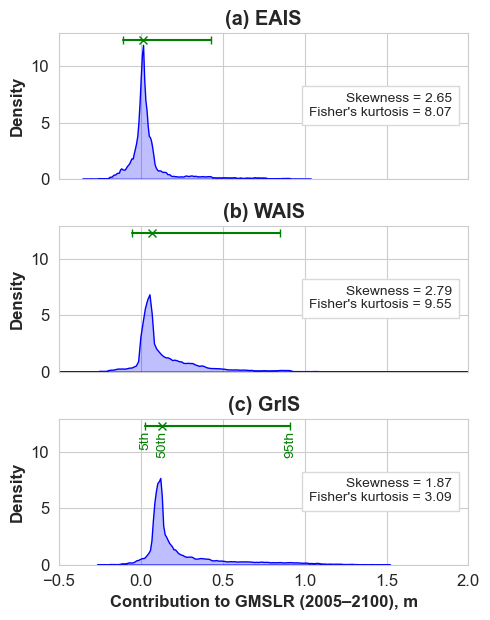

In [13]:
fig, _ = d23b.fig_ice_sheet_marginals(projection_source=projection_source, scenario=scenario, year=year,
                                      components=('EAIS', 'WAIS', 'GrIS'), n_samples=n_samples)
_ = d23b.name_save_fig(fig, feso='e')

## GRD fingerprints for three tide gauge locations

In [14]:
# Table of GRD fingerprints
grd_df = pd.DataFrame(columns=['EAIS', 'WAIS', 'GrIS'])
for gauge in ['REYKJAVIK', 'DUBLIN', 'TANJONG_PAGAR']:
    gauge_grd = d23b.get_gauge_grd(gauge=gauge)
    grd_df.loc[gauge] = gauge_grd
grd_df.round(2)

,EAIS,WAIS,GrIS
REYKJAVIK,1.11,1.17,-1.70
DUBLIN,1.10,1.12,-0.04
TANJONG_PAGAR,1.11,1.14,1.12


## Total ice-sheet contribution to RSLC versus fingerprint of GrIS

Written e02.pdf (0.04 MB)
Written e02.png (0.30 MB)


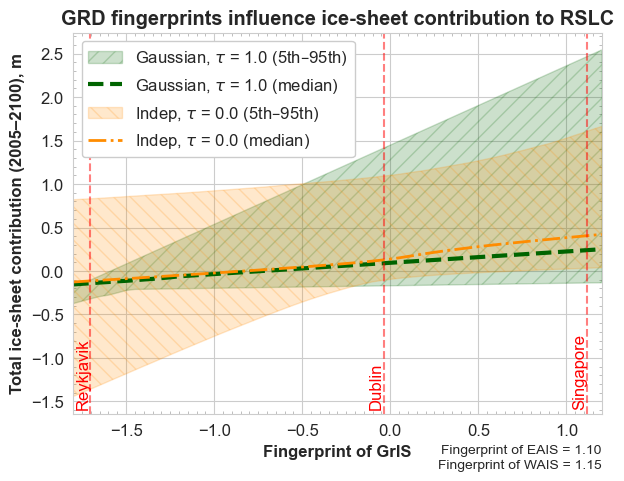

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.7), constrained_layout=True)
_ = d23b.ax_sum_vs_gris_fingerprint(projection_source=projection_source, scenario=scenario, year=year,
                                    families=(pv.BicopFamily.gaussian, pv.BicopFamily.indep),
                                    rotations=(0, 0), taus=(1.0, 0.0), colors=('darkgreen', 'darkorange'),
                                    n_samples=n_samples, ax=ax)
_ = d23b.name_save_fig(fig, feso='e')

In [16]:
! date

Fri Jul  7 09:26:16 +08 2023
